In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
f = open('data.json')
data = json.load(f)

In [3]:
Cities = list(data.keys())
len(Cities)

623

## creating dataframe

In [4]:
Data = pd.DataFrame()                              

for city in Cities:
    try:
        # Convert the city-wise restaurant data to pandas Dataframe
        DF = pd.DataFrame(data[city]['restaurants']).T  
        
        # add City column for each restaurants in that city
        City = [city for i in range(DF.shape[0])]
        DF['City'] = City
        
        # Because no sub-region so considering city as sub-region
        SubRegion = City                                          
        DF['SubRegion'] = SubRegion
        
        # Concatenate to main Dataframe
        Data = pd.concat([Data,DF])
        
    except:
        
        Subregions = list(data[city].keys())
        for region in Subregions:
            
            # Convert the city-wise restaurant data to pandas Dataframe
            DF = pd.DataFrame(data[city][region]['restaurants']).T
            
            # City
            City = [city for i in range(DF.shape[0])]
            # Add City column for each restaurants in that city
            DF['City'] = City
            
            # Sub-region
            SubRegion = [region for i in range(DF.shape[0])]
            
            # add sub-region column for each restaurants in that city
            DF['SubRegion'] = SubRegion
            Data = pd.concat([Data,DF])
        
Data.shape

(181404, 13)

In [5]:
def Menu(Data, i):
    Menu = list(Data.menu[i].keys())
    print('*'*35,Data['name'][i],',',Data['SubRegion'][i],Data['City'][i],'- Menu','*'*35)

    for item in Menu:
        print(item)
        Sub_menu = list(Data.menu[i][item].keys())
        for sub_item in Sub_menu :
            print(sub_item,'>>> Price :',Data.menu[i][item][sub_item]['price'], end =' | ')
            print('veg_or_non_veg :',Data.menu[i][item][sub_item]['veg_or_non_veg'])
        print('-'*100)
        
Menu(Data, 11223)

*********************************** Food Decker , Koramangala Bangalore - Menu ***********************************
Pasta
Fried Chicken Maggi >>> Price : 100 | veg_or_non_veg : Non-veg
Fried Veg Maggi >>> Price : 80 | veg_or_non_veg : Veg
Egg Maggi >>> Price : 80 | veg_or_non_veg : Non-veg
Veg Maggi >>> Price : 60 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Sandwiches
Chicken Fried Sandwich >>> Price : 150 | veg_or_non_veg : Non-veg
Chicken Sandwich >>> Price : 100 | veg_or_non_veg : Non-veg
Bread Butter Cheese >>> Price : 60 | veg_or_non_veg : Veg
Aloo Cheese Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg  Cheese Grill Sandwich >>> Price : 100 | veg_or_non_veg : Veg
Veg Sandwich >>> Price : 80 | veg_or_non_veg : Veg
----------------------------------------------------------------------------------------------------
Rolls
Chowmein Roll >>> Price : 100 | veg_or_non_veg : Veg
Malai Tikka Roll >>> Price : 

## Creating csv

In [6]:
Data.to_csv('Swiggy_data.csv')

In [7]:
df = pd.read_csv('Swiggy_data.csv')

In [8]:
df = pd.read_csv('Swiggy_data.csv')
menus = []
for i in range(Data.shape[0]):
    try:
        menus.append(', '.join([key for key in Data.menu[i].keys()]))
    except:
        menus.append(np.NaN)
print(len(menus))
print(df.shape[0])

181404
181404


In [9]:
df = df.rename(columns={'Unnamed: 0':'id', 'name':'Restaurant'})
df.drop_duplicates(subset='id', keep='first', inplace = True)
df.shape

(160621, 14)

In [10]:
df = df.loc[:,['id','Restaurant','City','SubRegion','cost','cuisine','rating','rating_count','lic_no',
               'address','menu','link', 'type', 'price']]
df.head()

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link,type,price
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",--,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...,NaN,NaN
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...",{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...,NaN,NaN
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city",{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...,NaN,NaN
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...,NaN,NaN
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",--,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...,NaN,NaN


In [11]:
df.isnull().sum()

id                   0
Restaurant         101
City                 0
SubRegion            0
cost             12177
cuisine          12145
rating             101
rating_count     12132
lic_no           12274
address          12132
menu             12031
link                 0
type            148591
price           148590
dtype: int64

In [12]:
df.City.replace(['Noida-1','Noida'],'Noida',inplace=True)

In [13]:
df = df.drop(['type','price'], axis =1)
df.dropna(inplace = True, axis = 0)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)
df.shape

(148290, 12)

In [14]:
Rating = []
for i in range(df.shape[0]):
    try:
        Rating.append(float(df.rating[i]))     
    except:
        #print(Data.rating[i])
        if df.rating[i] == '--' or 'NA':
            Rating.append(np.NaN)                
        else:
            print(df.rating[i])
print(len(Rating))
print(df.shape[0])
df.rating = Rating
df.rating.dtypes

148290
148290


dtype('float64')

In [15]:
df

,id,Restaurant,City,SubRegion,cost,cuisine,rating,rating_count,lic_no,address,menu,link
0,567335,AB FOODS POINT,Abohar,Abohar,₹ 200,"Beverages,Pizzas",NaN,Too Few Ratings,22122652000138,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",{'Burger': {'Aloo Tikki Burger': {'price': '40...,https://www.swiggy.com/restaurants/ab-foods-po...
1,531342,Janta Sweet House,Abohar,Abohar,₹ 200,"Sweets,Bakery",4.4,50+ ratings,12117201000112,"Janta Sweet House, Bazar No.9, Circullar Road,...",{'Breakfast': {'Veg Grilled Sandwich': {'price...,https://www.swiggy.com/restaurants/janta-sweet...
2,158203,theka coffee desi,Abohar,Abohar,₹ 100,Beverages,3.8,100+ ratings,22121652000190,"theka coffee desi, sahtiya sadan road city",{'Recommended': {'Cafe Latte Coffee': {'price'...,https://www.swiggy.com/restaurants/theka-coffe...
3,187912,Singh Hut,Abohar,Abohar,₹ 250,"Fast Food,Indian",3.7,20+ ratings,22119652000167,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",{'Recommended': {'Malai Chaap': {'price': '200...,https://www.swiggy.com/restaurants/singh-hut-n...
4,543530,GRILL MASTERS,Abohar,Abohar,₹ 250,"Italian-American,Fast Food",NaN,Too Few Ratings,12122201000053,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...","{'Veg Burgers': {'Junior': {'price': '65', 've...",https://www.swiggy.com/restaurants/grill-maste...
...,...,...,...,...,...,...,...,...,...,...,...,...
148285,553122,The Food Delight,Yavatmal,Yavatmal,₹ 200,"Fast Food,Snacks",NaN,Too Few Ratings,21522053000452,"The Food Delight, 94MC+X35, New Singhania Naga...",{'Recommended': {'Punjabi Tadka Maggi': {'pric...,https://www.swiggy.com/restaurants/the-food-de...
148286,562647,MAITRI FOODS & BEVERAGES,Yavatmal,Yavatmal,₹ 300,Pizzas,NaN,Too Few Ratings,license,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",{'Pizza': {'Tomato Onion Cheese Pizza [Regular...,https://www.swiggy.com/restaurants/maitri-food...
148287,559435,Cafe Bella Ciao,Yavatmal,Yavatmal,₹ 300,"Fast Food,Snacks",NaN,Too Few Ratings,21522251000378,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...","{'Recommended': {'Coke Float': {'price': '90',...",https://www.swiggy.com/restaurants/cafe-bella-...
148288,418989,GRILL ZILLA,Yavatmal,Yavatmal,₹ 250,Continental,NaN,Too Few Ratings,21521251000241,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",{'Veg Burgers': {'Aloo Patty Burger': {'price'...,https://www.swiggy.com/restaurants/grill-zilla...


## 1) How many cities (including subregions) where Swiggy is having its restaurants listed?

In [16]:
cities_SubRegion=df['SubRegion'].nunique()
print("Total number of cities (including subregions) where Swiggy has listed restaurants:", cities_SubRegion)

Total number of cities (including subregions) where Swiggy has listed restaurants: 820


## 2) How many cities  (don't include subregions) where Swiggy is having their restaurants listed?

In [17]:
unique_cities = df['City'].nunique()
print("Total number of cities where Swiggy has listed restaurants:", unique_cities)

Total number of cities where Swiggy has listed restaurants: 551


## 3) The Subregion of Delhi with the maximum number of restaurants listed on Swiggy?

In [18]:
delhi_restaurants = df[df['City'] == 'Delhi']
# Count occurrences of each subregion in Delhi
subregion_counts = delhi_restaurants['SubRegion'].value_counts()
# Print the subregion along with the number of restaurants for each subregion
for subregion, count in subregion_counts.items():
    print(f"Subregion: {subregion}, Number of Restaurants: {count}")


Subregion: Indirapuram, Number of Restaurants: 1279
Subregion: Rohini, Number of Restaurants: 1135
Subregion: Greater Kailash 2, Number of Restaurants: 1037
Subregion: Laxmi Nagar, Number of Restaurants: 930
Subregion: Malviya Nagar, Number of Restaurants: 896
Subregion: Dwarka, Number of Restaurants: 720
Subregion: Rajouri Garden, Number of Restaurants: 709
Subregion: GTB Nagar, Number of Restaurants: 679
Subregion: Dilshad Gardens, Number of Restaurants: 677
Subregion: Mayur Vihar, Number of Restaurants: 674
Subregion: Chattarpur, Number of Restaurants: 635
Subregion: Ashok Vihar, Number of Restaurants: 530
Subregion: Uttam Nagar, Number of Restaurants: 528
Subregion: Vasant Kunj, Number of Restaurants: 454
Subregion: NSP, Number of Restaurants: 449
Subregion: Lajpat Nagar, Number of Restaurants: 448
Subregion: Jasola, Number of Restaurants: 402
Subregion: Kirti Nagar, Number of Restaurants: 379
Subregion: South Extension, Number of Restaurants: 374
Subregion: South Campus, Number of

## 4) Name the top 5 Most Expensive Cities in the Datasets.

In [19]:
def extract_numeric_cost(cost_str):
    if isinstance(cost_str, str):
        return int(cost_str.split()[-1].replace(',', ''))
    else:
        return 0

# Convert the "cost" column to numeric values
df['numeric_cost'] = df['cost'].apply(extract_numeric_cost)

# Group by "City" and calculate the mean cost for each city
city_avg_cost = df.groupby('City')['numeric_cost'].mean()

# Sort the cities by average cost in descending order
top_5_cities = city_avg_cost.sort_values(ascending=False).head(5)

# Display the top 5 most expensive cities
print("Top 5 Most Expensive Cities:")
print(top_5_cities)


Top 5 Most Expensive Cities:
City
Hinganghat    18962.437500
North-goa       468.964045
Gangtok         466.666667
Mussoorie       460.000000
South-goa       442.857143
Name: numeric_cost, dtype: float64


## 5) List out the top 5 Restaurants with Maximum & minimum ratings throughout the dataset.

In [20]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Sort the DataFrame by rating in descending order to get top 5 maximum-rated restaurants
top_5_max_ratings = df.sort_values(by='rating', ascending=False).head(5)

# Sort the DataFrame by rating in ascending order to get top 5 minimum-rated restaurants
top_5_min_ratings = df.sort_values(by='rating', ascending=True).head(5)

# Display the top 5 restaurants with maximum ratings
print("Top 5 Restaurants with Maximum Ratings:")
print(top_5_max_ratings[['Restaurant', 'City', 'rating']])

# Display the top 5 restaurants with minimum ratings
print("\nTop 5 Restaurants with Minimum Ratings:")
print(top_5_min_ratings[['Restaurant', 'City', 'rating']])


Top 5 Restaurants with Maximum Ratings:
                                        Restaurant       City  rating
20647                              Shawarma Indiah  Bangalore     5.0
10687  JUST CREAMERY - Artisanal Healthy Ice Cream  Bangalore     5.0
13058                           Fresh crunch pizza  Bangalore     5.0
51977                                  Just Dig In      Delhi     5.0
59832                                  Just Dig In      Delhi     5.0

Top 5 Restaurants with Minimum Ratings:
                              Restaurant        City  rating
34240            Ice Cream and Shakes Co  Chandigarh     1.0
18539                    Persian Delight   Bangalore     1.1
144921  Champaran Mutton Hundy & Biryani    Varanasi     1.2
51869                     THE TARI STORY       Delhi     1.2
68076       The Hyderabadi Biryani House     Gurgaon     1.2


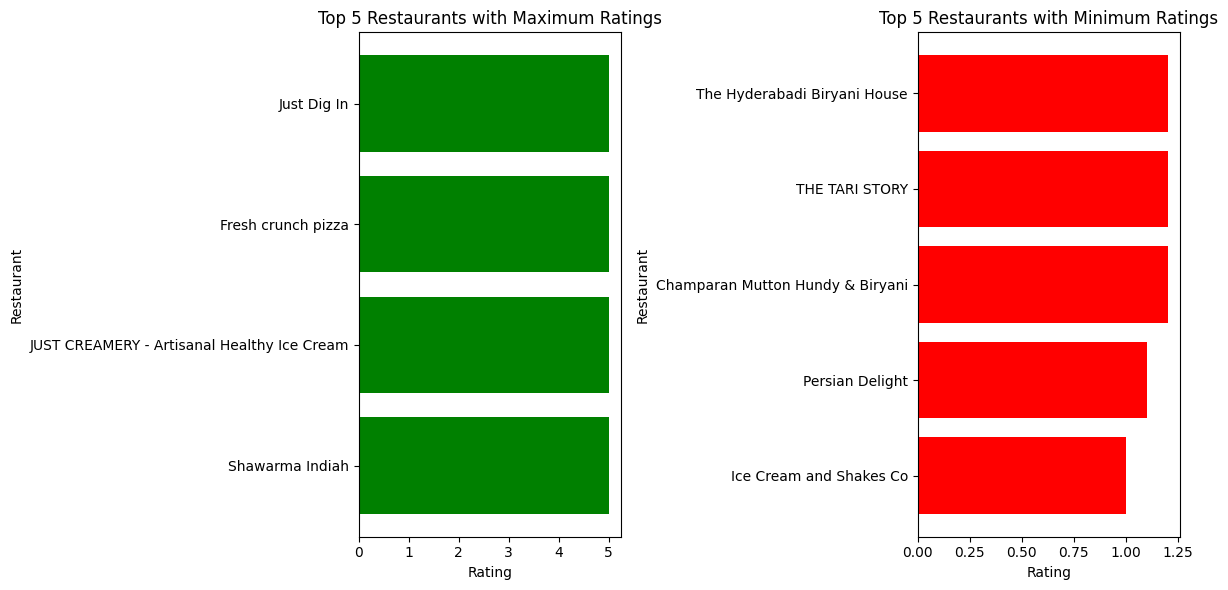

In [21]:
plt.figure(figsize=(12, 6))

# Plot for top 5 maximum-rated restaurants
plt.subplot(1, 2, 1)
plt.barh(top_5_max_ratings['Restaurant'], top_5_max_ratings['rating'], color='green')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 5 Restaurants with Maximum Ratings')

# Plot for top 5 minimum-rated restaurants
plt.subplot(1, 2, 2)
plt.barh(top_5_min_ratings['Restaurant'], top_5_min_ratings['rating'], color='red')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 5 Restaurants with Minimum Ratings')

plt.tight_layout()
plt.show()

## 6) Name of top 5 cities with the highest number of restaurants listed.

In [22]:
city_counts = df['City'].value_counts()

# Get the top 5 cities with the highest number of restaurants listed
top_5_cities = city_counts.head(5)

# Display the names of the top 5 cities
print("Top 5 Cities with the Highest Number of Restaurants Listed:")
print(top_5_cities)


Top 5 Cities with the Highest Number of Restaurants Listed:
Bangalore    15288
Delhi        14048
Pune         12412
Hyderabad     9996
Chennai       9940
Name: City, dtype: int64


## 7) Top 10 cities as per the number of restaurants listed?

In [23]:
city_counts = df['City'].value_counts()

# Get the top 10 cities with the highest number of restaurants listed
top_10_cities = city_counts.head(10)

# Display the names of the top 10 cities
print("Top 10 Cities with the Highest Number of Restaurants Listed:")
print(top_10_cities)


Top 10 Cities with the Highest Number of Restaurants Listed:
Bangalore     15288
Delhi         14048
Pune          12412
Hyderabad      9996
Chennai        9940
Kolkata        8271
Mumbai         6064
Ahmedabad      3538
Chandigarh     3311
Lucknow        2842
Name: City, dtype: int64


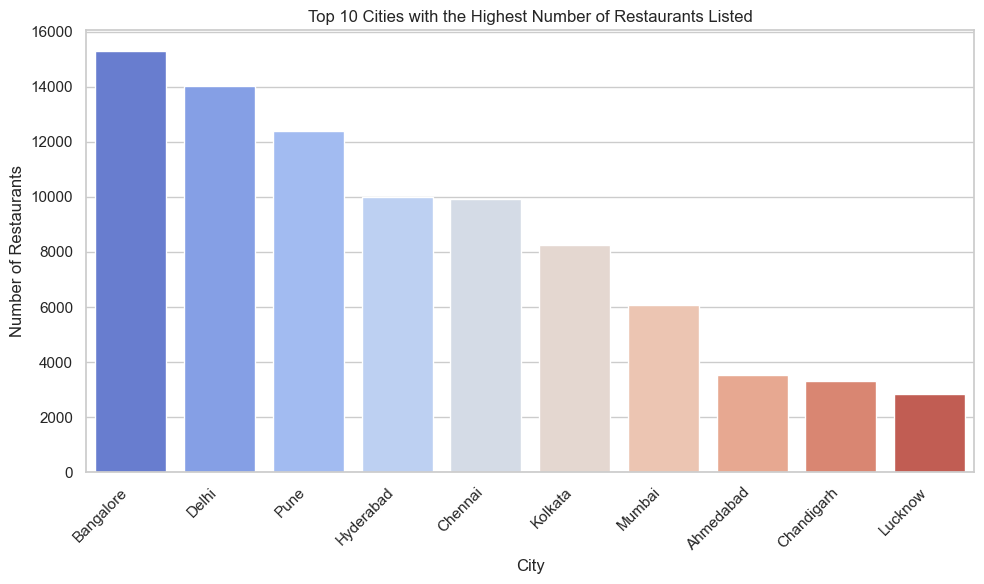

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with the Highest Number of Restaurants Listed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8) Name the top 5 Most Popular Restaurants in Pune.

In [25]:
pune_restaurants = df[df['City'] == 'Pune']

# Sort the DataFrame by rating_count in descending order to get top 5 most popular restaurants
top_5_popular_pune_restaurants = pune_restaurants.sort_values(by='rating', ascending=False).head(5)

# Display the names of the top 5 most popular restaurants in Pune
print("Top 5 Most Popular Restaurants in Pune:")
print(top_5_popular_pune_restaurants[['Restaurant', 'rating']])


Top 5 Most Popular Restaurants in Pune:
                   Restaurant  rating
128916  Paratha Box by EatFit     5.0
122077          HRX by Eatfit     5.0
127537        CIRCLE OF CRUST     5.0
130325      Kushta by Semporo     5.0
128253          HRX by Eatfit     5.0


## 9) Which SubRegion in Delhi is having the least expensive restaurant in terms of cost?

In [26]:
delhi_restaurants = df[df['City'] == 'Delhi']

# Convert the "cost" column to numeric values
delhi_restaurants['numeric_cost'] = delhi_restaurants['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Find the SubRegion with the minimum cost
least_expensive_subregion = delhi_restaurants.loc[delhi_restaurants['numeric_cost'].idxmin(), 'SubRegion']

# Display the SubRegion with the least expensive restaurant
print("SubRegion in Delhi with the Least Expensive Restaurant:")
print(least_expensive_subregion)


SubRegion in Delhi with the Least Expensive Restaurant:
Dilshad Gardens


## 10) Top 5 most popular restaurant chains in India?

In [27]:
restaurant_chain_cities = df.groupby('Restaurant')['City'].nunique()

# Sort the restaurant chains based on the number of unique cities in descending order
top_5_popular_chains = restaurant_chain_cities.sort_values(ascending=False).head(5)

# Display the top 5 most popular restaurant chains in India
print("Top 5 Most Popular Restaurant Chains in India based on Presence in All Cities:")
print(top_5_popular_chains)


Top 5 Most Popular Restaurant Chains in India based on Presence in All Cities:
Restaurant
Domino's Pizza                                     246
KFC                                                155
Pizza Hut                                          155
Baskin Robbins                                     117
Kwality Walls Frozen Dessert and Ice Cream Shop    112
Name: City, dtype: int64


## Subregion wise

In [28]:
restaurant_chain_cities = df.groupby(['Restaurant', 'City', 'SubRegion'])['SubRegion'].count()

# Find the number of unique cities (including subregions) for each restaurant chain
restaurant_chain_cities_counts = restaurant_chain_cities.groupby('Restaurant').count()

# Sort the restaurant chains based on the number of unique cities (including subregions) in descending order
top_5_popular_chains = restaurant_chain_cities_counts.sort_values(ascending=False).head(5)

# Display the top 5 most popular restaurant chains in India (including subregions)
print("Top 5 Most Popular Restaurant Chains in India (including subregions):")
print(top_5_popular_chains)


Top 5 Most Popular Restaurant Chains in India (including subregions):
Restaurant
Domino's Pizza                                     443
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    298
Baskin Robbins                                     275
Name: SubRegion, dtype: int64


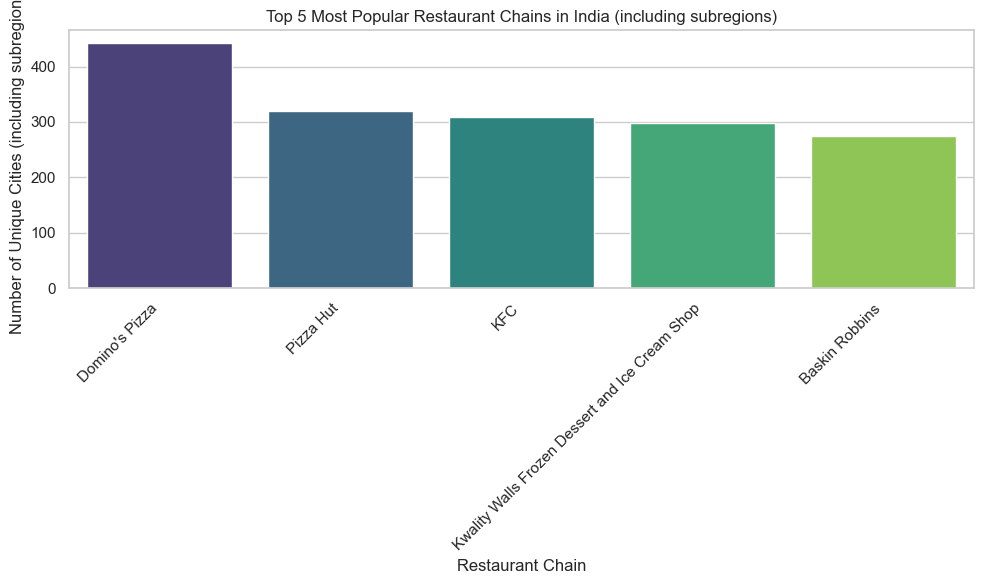

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_popular_chains.index, y=top_5_popular_chains.values, palette='viridis')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Unique Cities (including subregions)')
plt.title('Top 5 Most Popular Restaurant Chains in India (including subregions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 11) Which restaurant in Pune has the most number of people visiting?

In [30]:
pune_five_star = df[(df['City'] == 'Pune') & (df['rating'] == 5.0)]

# Find the restaurant with the highest rating count
most_visited_restaurant = pune_five_star.loc[pune_five_star['rating'].idxmax(), 'Restaurant']

# Display the restaurant in Pune with the most number of people visiting (based on 5-star rating count)
print("Restaurant in Pune with the Most Number of People Visiting (based on 5-star rating count):")
print(most_visited_restaurant)


Restaurant in Pune with the Most Number of People Visiting (based on 5-star rating count):
The Samosa Man


## 12) Top 10 Restaurants with Maximum Ratings in Banglore

In [31]:
bangalore_restaurants = df[df['City'] == 'Bangalore']

# Convert the "rating" column to numeric values
bangalore_restaurants['rating'] = pd.to_numeric(bangalore_restaurants['rating'], errors='coerce')

# Sort the DataFrame by rating in descending order to get top 10 maximum-rated restaurants in Bangalore
top_10_max_ratings_bangalore = bangalore_restaurants.sort_values(by='rating', ascending=False).head(10)

# Display the top 10 restaurants with maximum ratings in Bangalore
print("Top 10 Restaurants with Maximum Ratings in Bangalore:")
print(top_10_max_ratings_bangalore[['Restaurant', 'rating']])


Top 10 Restaurants with Maximum Ratings in Bangalore:
                                        Restaurant  rating
22067  JUST CREAMERY - Artisanal Healthy Ice Cream     5.0
13240                            THE INDIAN SAMOSA     5.0
9758                              Creams and Bites     5.0
16431                               OLIVE PIZZERIA     5.0
23990                               MOKA ON THE GO     5.0
21158                               Bombay 2 Delhi     5.0
19565                                     BigBites     5.0
16566                      Joao's Croissant Fusion     5.0
9808                  Bansal's Thali & Combo Meals     5.0
16588                      Hot Chillies Fast  Food     5.0


In [32]:
patna_restaurants = df[df['City'] == 'Patna']

# Convert the "rating" column to numeric values
patna_restaurants['rating'] = pd.to_numeric(patna_restaurants['rating'], errors='coerce')

# Sort the DataFrame by rating in descending order to get top 10 maximum-rated restaurants in Patna
top_10_max_ratings_patna = patna_restaurants.sort_values(by='rating', ascending=False).head(10)

# Display the top 10 restaurants with maximum ratings in Patna
print("Top 10 Restaurants with Maximum Ratings in Patna:")
print(top_10_max_ratings_patna[['Restaurant', 'rating']])


Top 10 Restaurants with Maximum Ratings in Patna:
                                             Restaurant  rating
119104  Kwality Walls Frozen Dessert and Ice Cream Shop     4.6
119304                                    Slurpy Shakes     4.6
119338                    Cupcake Bliss Cake & Desserts     4.5
119361                                     Burger It Up     4.5
119292                      Kouzina Kafe The Food Court     4.5
119593                                   GARAGE KITCHEN     4.5
119321                                 The Dessert Zone     4.4
119370                       Pure Veg Meals by Lunchbox     4.4
119547                                 KINGDOM OF MOMOS     4.4
119310                                  Indiana Burgers     4.4


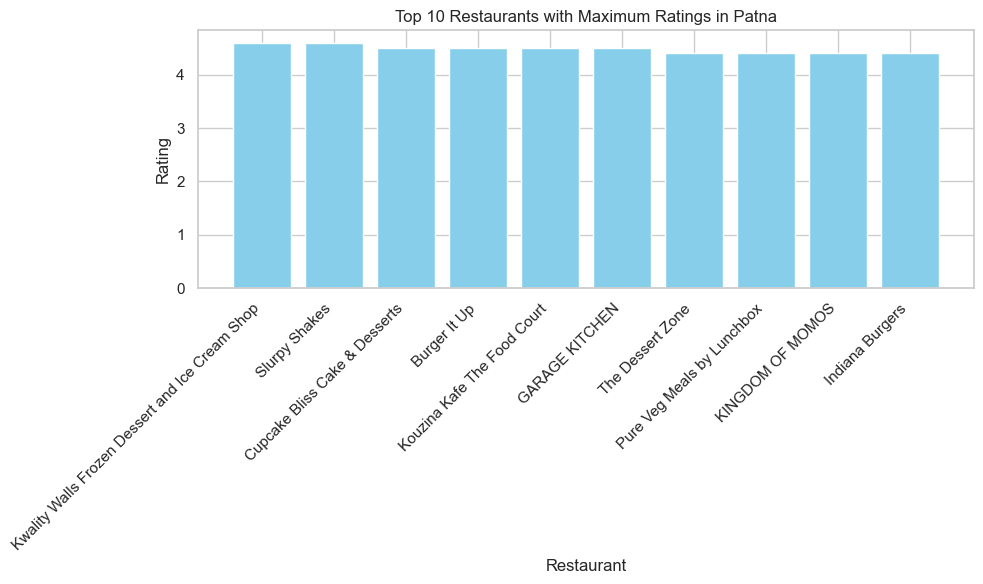

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_max_ratings_patna['Restaurant'], top_10_max_ratings_patna['rating'], color='skyblue')
plt.xlabel('Restaurant')
plt.ylabel('Rating')
plt.title('Top 10 Restaurants with Maximum Ratings in Patna')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()